In [1]:
import cv2
import numpy as np
import cairocffi as cairo
import io
import preproc
import detection
from detection import CHARTYPE
import chrecog
chrecog.load_ckpt("data/161020.ckpt")
import reconst
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.cmap'] = 'Greys'

ckpt loaded


In [2]:
def write_line(text, font="NanumGothic"):
    WIDTH, HEIGHT = 540, 100
    surface = cairo.ImageSurface (cairo.FORMAT_RGB24, WIDTH, HEIGHT)
    ctx = cairo.Context (surface)
    ctx.set_font_size(40)
    ctx.set_source_rgb(0, 0, 0)
    ctx.paint()
    ctx.set_source_rgb(1, 1, 1)
    ctx.select_font_face(font, cairo.FONT_SLANT_NORMAL,
                cairo.FONT_WEIGHT_NORMAL)
    ctx.move_to(20,40)
    ctx.show_text(text)
    fb = io.BytesIO()
    surface.write_to_png(fb)
    fb.seek(0)
    blob = fb.read()
    blob_array = np.asarray(bytearray(blob), dtype=np.uint8)
    mat = cv2.imdecode(blob_array, 0)
    fb.close()
    return mat

In [3]:
def test_line(text, font="NanumGothic"):
    img = write_line(text, font)
    plt.figure()
    plt.imshow(img)

    processed = preproc.process(img)
    graphs = detection.get_graphs(processed)

    i=0
    for p in graphs:
        for l in p.lines:
            for c in l.chars:
                if i % 10 == 0:
                    plt.figure()
                plt.subplot(1,10,i%10+1)
                plt.xticks(())
                plt.yticks(())
                plt.imshow(c.img)
                i += 1
                c.pred = chrecog.get_pred_one(c.img)

    print(reconst.build_graphs(graphs), end="")
    
def test_img(path):
    img = cv2.imread(path)
    plt.figure()
    plt.imshow(img)

    processed = preproc.process(img)
    #processed = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    graphs = detection.get_graphs(processed)

    i=0
    for p in graphs:
        for l in p.lines:
            for c in l.chars:
                if c.type == CHARTYPE.BLANK:
                    continue
                if i % 10 == 0:
                    plt.figure()
                plt.subplot(1,10,i%10+1)
                plt.xticks(())
                plt.yticks(())
                plt.imshow(c.img)
                i += 1
                c.pred = chrecog.get_pred_one(c.img)

    print(reconst.build_graphs(graphs))

/home/csehome/northfolk28/.virtualenvs/martini/lib/python3.4/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


라 인 찾 기 테 스 트 , 
====
빔 으 로 쏜 이 미 지 파 입 믈 인 풋 으 로 받 아 서 라 인 바 이 라 인 으 로 나 눠 진 이 미 지 를 내 보 낸 다 , 
Th& t&St (S dpn& fpP (mqg& Nl&S (n기ung bpth wP&qm En(Sh & Sp& ChqPqCt&P됴 
====
다 양 한 띄 어 쓰 기 에 서 라 인 믈 정 쏵 하 게 구 분 하 는 지 를 테 스 트 한 다 , 
한 급 과 한 급 믈 바 로 이 어 쏜 경 유 , 영 어 와 영 어 를 바 로 이 어 쏜 경 유 , 띄 어 쏜 경 유 , 특 수 문 자 가 연 속 된 라 인 에 나 열 된 경 유 듬 믈 모 두 본 다 , 
====
ABCDEF qppl& bqnqnq Cqndy dqt& &l&phqnt fun gP&qt h&qv&n (nt&P&St(ng 
j&puS @v(n l& mlp npPm 
^쌰I I*)C, 
쌰heLLoheLLoheLLo, 안 녕 하 세 요 , 
====



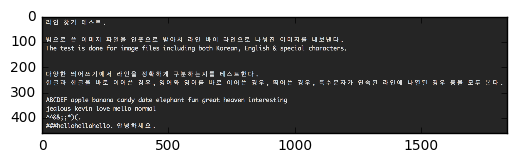

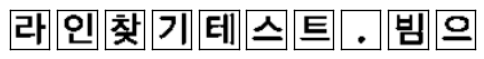

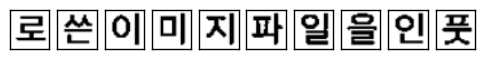

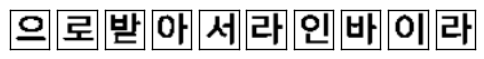

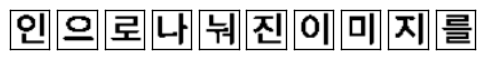

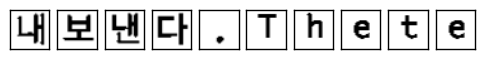

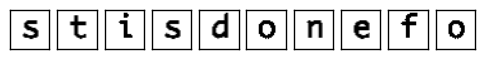

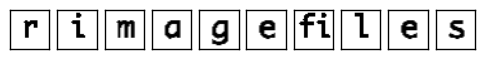

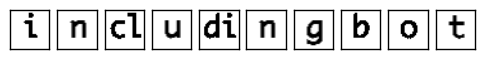

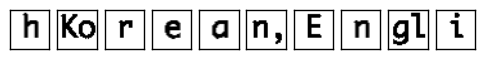

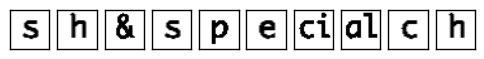

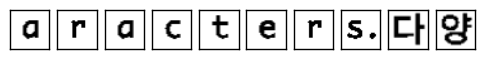

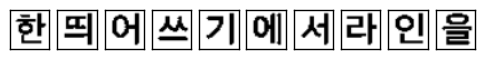

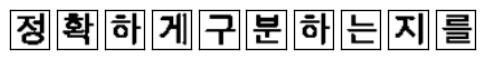

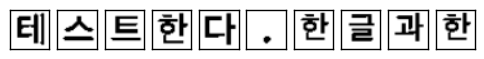

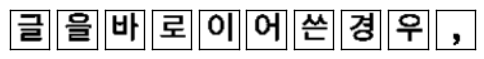

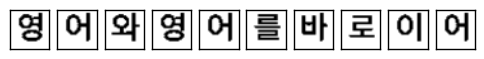

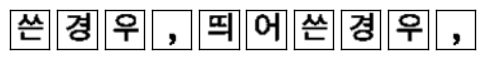

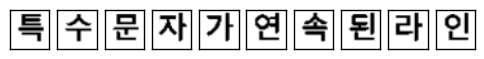

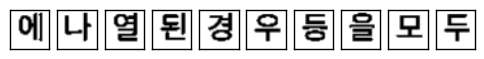

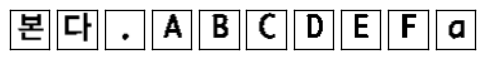

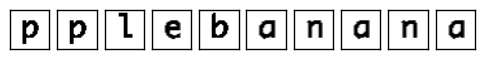

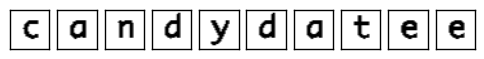

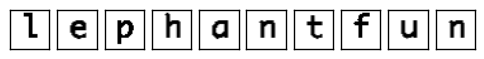

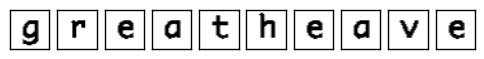

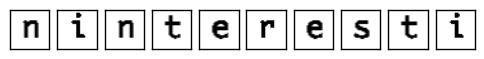

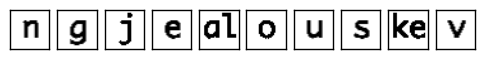

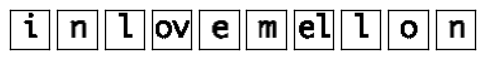

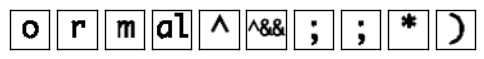

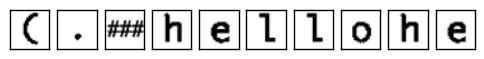

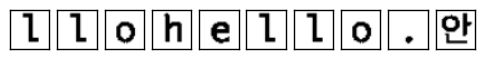

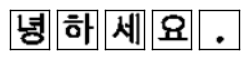

In [4]:
test_img("detection/test/line_testing/test.png")